In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
import numpy as np


In [30]:
mase = MeanAbsoluteScaledError()
dataset = 'covid_deaths_dataset'

In [36]:
def plot_predictions(x, y_true, predictions, title):
    fig, ax = plt.subplots()

    horizon = len(predictions.columns) + 5
    ax.plot(x[-horizon:], y_true[-horizon:], label='ground truth')
    
    x_pred = x[-len(predictions.columns):]
    for modelname in predictions.index:
        ax.plot(x_pred, predictions.loc[modelname].to_list(), label=modelname)
    ax.legend()
    ax.tick_params(axis='x', labelrotation = 90)    
    ax.set_title(title)

    autoregression  moving average      ARMA    TBATS  ensemble
T1        1.642997        3.205781  1.324142  2.16183  1.396702


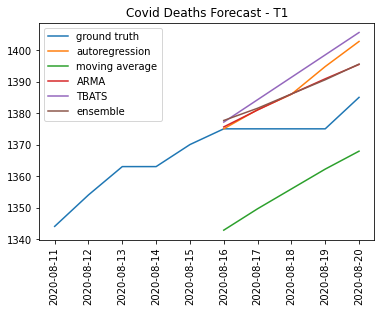

In [38]:
errors = {}

for i in range(1,2):
    data = pd.read_csv(f'data/clean/{dataset}.csv').set_index('date')
    x = pd.to_datetime(data.index, format='%Y-%m-%d')
    seriesname = f'T{i}'

    y_true = data[seriesname].values
    predictions = pd.read_csv(f'results/predictions/{dataset}_{seriesname}_5.csv', index_col=0)

    errors[seriesname] = {
        modelname: mase(y_true[-len(predictions.columns):], np.array(predictions.loc[modelname]), y_train=y_true[:-len(predictions.columns)]) for modelname in predictions.index
    }

    plot_predictions(x, y_true, predictions, f'Covid Deaths Forecast - {seriesname}')

errors = pd.DataFrame.from_dict(errors, orient='index')
errors.to_csv(f'results/{dataset}_MASE.csv')

print(errors)